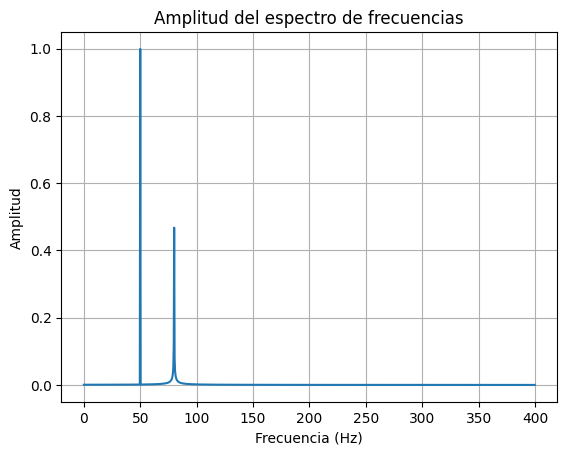

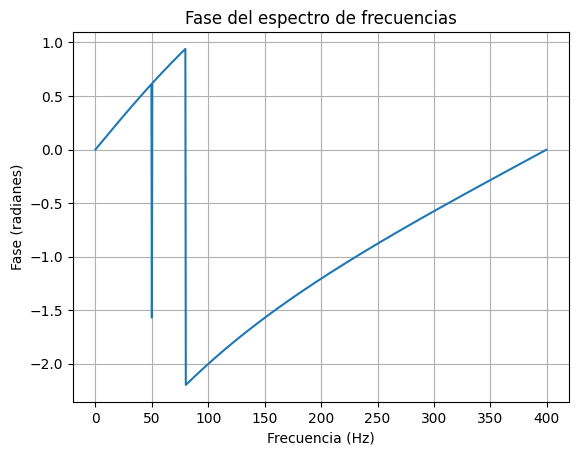

Amplitudes esperadas: [1.0, 0.4]
Frecuencias dominantes: [50.       80.078125]
Amplitudes obtenidas: [0.99922702] [0.4676693]


In [9]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def detectar_picos(Y, umbral=0.1):
    picos, _ = find_peaks(Y, height=umbral)
    return picos

#Generar una señal de ejemplo (suma de dos senoidales)
N=2048 #Número de puntos de muestra
T=1.0/800.0 
t = np.linspace(0.0, N*T, N, endpoint = False)
y = np.sin(50.0*2.0*np.pi*t) + 0.5*np.sin(80.0*2.0*np.pi*t)

#Calcular la FFT
yf = fft(y)
tf = fftfreq(N,T)[:N//2]

#Visualizar el espectro de frecuencias
plt.plot(tf, (2.0/N)*np.abs(yf[0:N//2]))
#plt.plot(tf,np.abs(yf[0:N//2])) 

plt.title('Amplitud del espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Fase
phase = np.angle(yf)

# Visualización de la fase
plt.plot(tf, phase[:N//2])
plt.title('Fase del espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.show()

# Amplitudes esperadas
amplitudes_esperadas = [1.0, 0.4]
picos_detectados = detectar_picos((2.0/N)*np.abs(yf[:N//2]),0.1)
frecuencias_dominantes = tf[picos_detectados]

# Amplitudes obtenidas
amplitudes_obtenidas = (2.0/N)*np.abs(yf[:N//2])
print("Amplitudes esperadas:", amplitudes_esperadas)
print("Frecuencias dominantes:", frecuencias_dominantes)
print("Amplitudes obtenidas:", amplitudes_obtenidas[np.isclose(tf, frecuencias_dominantes[0])], amplitudes_obtenidas[np.isclose(tf, frecuencias_dominantes[1])])


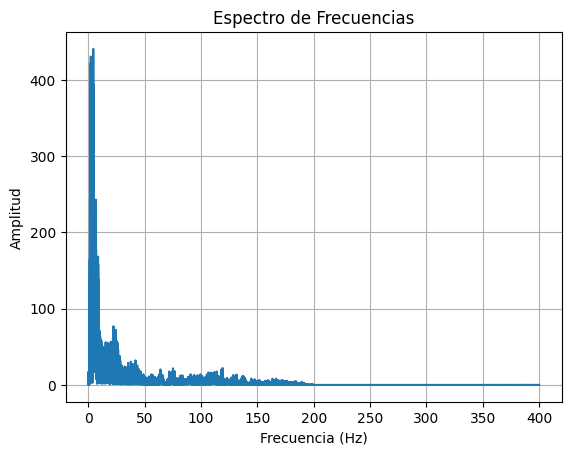

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

#Leer el archivo de audio
sample_rate, data = wavfile.read('un_archivo_audio.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Número de muestras
N = len(data)

#Calcular la FFT
yf = fft(data)
xf = fftfreq(N,T)[:N//2]

#Visualizar el espectro de frecuencias
plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
#Eje X (Frecuencia): Muestra las frecuencias presentes en la señal.
#Eje Y (Amplitud): Muestra la magnitud de cada frecuencia. 
#Picos altos indican las frecuencias dominantes en la señal.



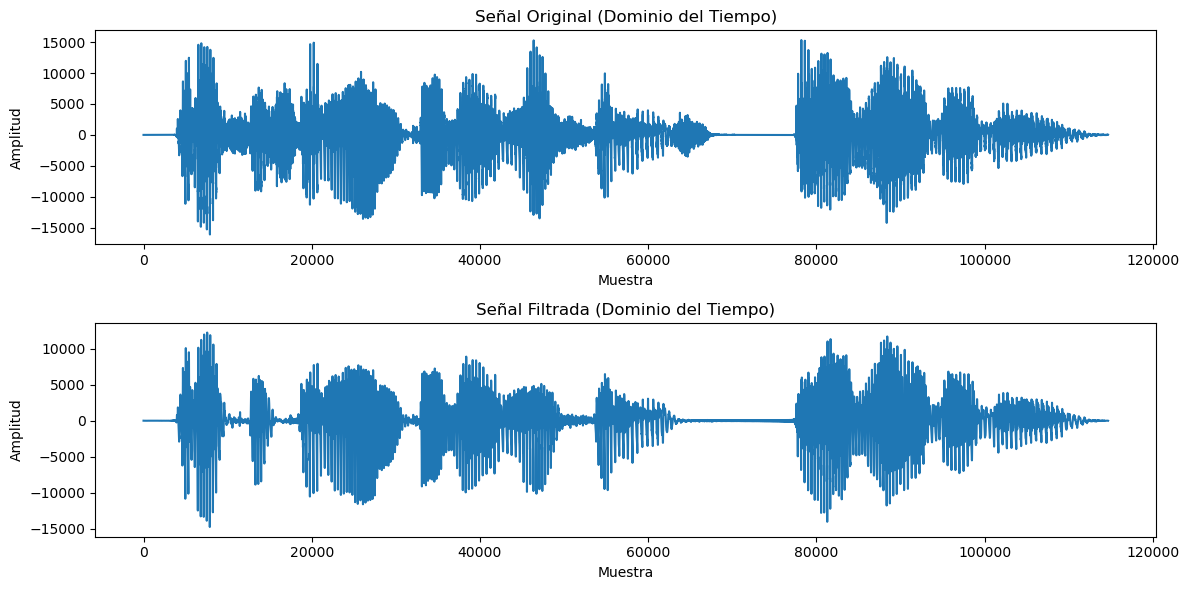

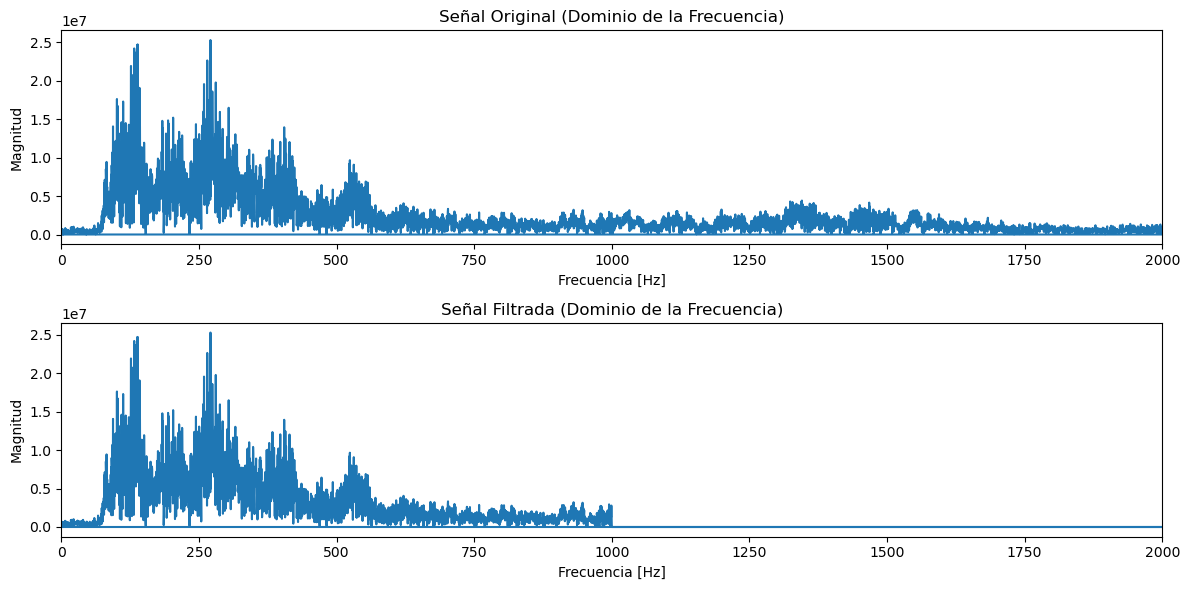

In [4]:
#Un filtro ideal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft

# Cargar el archivo de audio
ratio_muestrado, senal = wavfile.read('un_archivo_audio.wav')

# Si el audio es estéreo, tomar solo un canal
if len(senal.shape) == 2:
    senal = senal[:, 0]

# Realizar la Transformada de Fourier en la señal original
yf = fft(senal)
xf = fftfreq(len(senal), 1 / ratio_muestrado)

# Aplicar un filtro pasabajos (frecuencia de corte en 1000 Hz)
freq_corte = 1000
yf_filtrado = yf.copy()
yf_filtrado[np.abs(xf) > freq_corte] = 0

# Realizar la Transformada Inversa de Fourier para obtener la señal filtrada
senal_filtrada = ifft(yf_filtrado)

# Graficar las señales original y filtrada en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(senal)
plt.title('Señal Original (Dominio del Tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(senal_filtrada.real)
plt.title('Señal Filtrada (Dominio del Tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Graficar el espectro de frecuencia de las señales original y filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf, np.abs(yf))
plt.title('Señal Original (Dominio de la Frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización

plt.subplot(2, 1, 2)
plt.plot(xf, np.abs(yf_filtrado))
plt.title('Señal Filtrada (Dominio de la Frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización

plt.tight_layout()
plt.show()


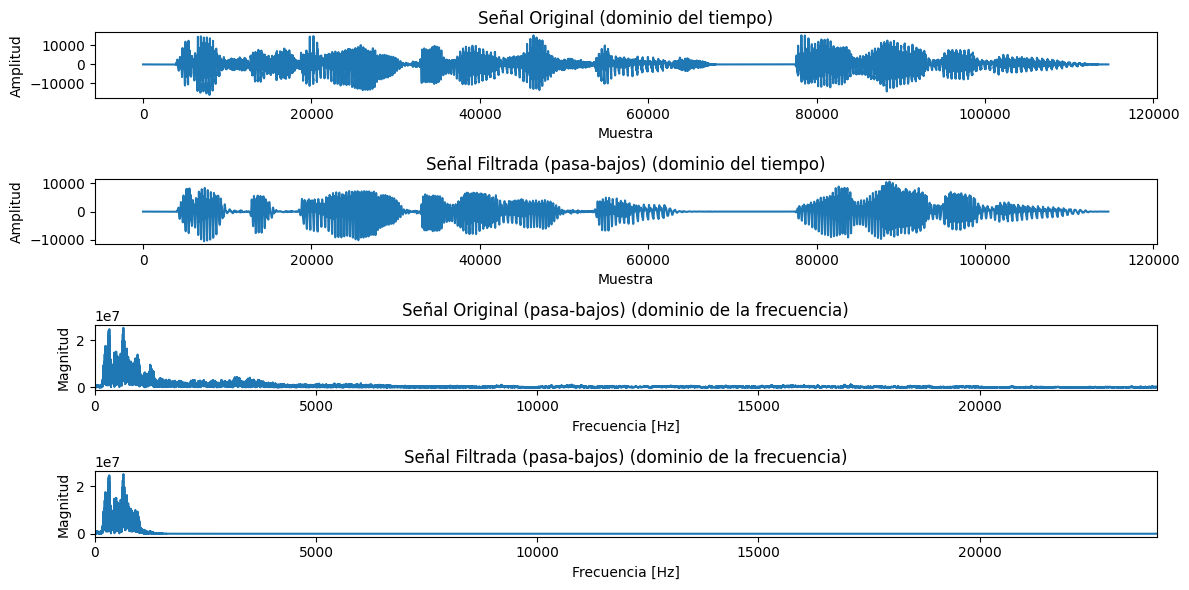

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

#Función para diseñar un filtro pasa-bajos
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff / nyq
    b,a = butter(order, normal_cutoff, btype='low', analog=False)
    return b,a

# Función para aplicar el filtro.
def lowpass_filter(data, cutoff, fs, order=5):
    b,a = butter_lowpass(cutoff, fs, order=order)
    y=lfilter(b,a,data)
    return y

#leer el archivo de audio
sample_rate, data = wavfile.read('un_archivo_audio.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Parámetros del filtro
cutoff = 400.0 #Frecuencia de corte en HZ
order = 8 #Orden del filtro

#Aplicar el filtro pasa-bajos
filtered_data = lowpass_filter(data, cutoff, sample_rate, order)

#Guardar la señal filtrada en un nuevo archivo de audio
wavfile.write('audio_filtrado_pasobajo.wav', sample_rate, filtered_data.astype(np.int16))

#Visualizar la señal original y filtrada
plt.figure(figsize=(12,6))

plt.subplot(4,1,1)
plt.plot(data)
plt.title('Señal Original (dominio del tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(4,1,2)
plt.plot(filtered_data.real)
plt.title('Señal Filtrada (pasa-bajos) (dominio del tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

yf_original = fft(data)
yf_filtrada = fft(filtered_data)
xf = fftfreq(len(data), 1 / sample_rate)

plt.subplot(4,1,3)
plt.plot(np.abs(yf_original))
plt.xlim(0, sample_rate / 2)  # Limitar el eje x para evitar aliasing
plt.title('Señal Original (pasa-bajos) (dominio de la frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.subplot(4,1,4)
plt.plot(np.abs(yf_filtrada))
plt.xlim(0, sample_rate / 2)  # Limitar el eje x para evitar aliasing
plt.title('Señal Filtrada (pasa-bajos) (dominio de la frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

NameError: name 'fft' is not defined

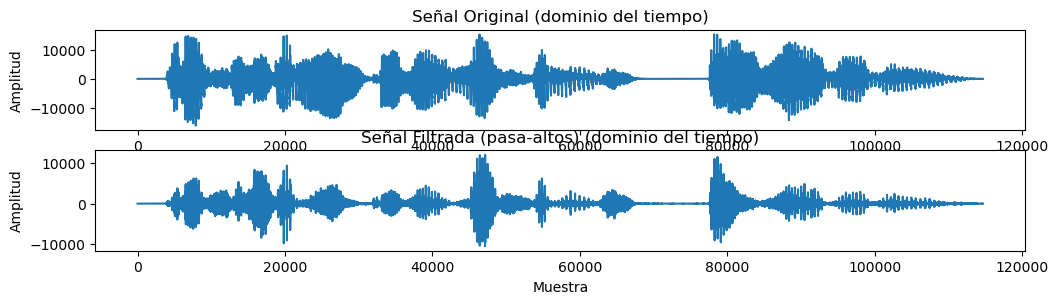

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

#Función para diseñar un filtro pasa-altos
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff / nyq
    b,a = butter(order, normal_cutoff, btype='high', analog=False)
    return b,a

# Función para aplicar el filtro.
def highpass_filter(data, cutoff, fs, order=5):
    b,a = butter_highpass(cutoff, fs, order=order)
    y=lfilter(b,a,data)
    return y

#leer el archivo de audio
sample_rate, data = wavfile.read('un_archivo_audio.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Parámetros del filtro
cutoff = 1000.0 #Frecuencia de corte en HZ
order = 8 #Orden del filtro

#Aplicar el filtro pasa-altos
filtered_data = highpass_filter(data, cutoff, sample_rate, order)

#Guardar la señal filtrada en un nuevo archivo de audio
wavfile.write('audio_filtrado_pasoalto.wav', sample_rate, filtered_data.astype(np.int16))

plt.figure(figsize=(12,6))
#Visualizar la señal original y filtrada
plt.subplot(4,1,1)
plt.plot(data)
plt.title('Señal Original (dominio del tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(4,1,2)
plt.plot(filtered_data.real)
plt.title('Señal Filtrada (pasa-altos) (dominio del tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

yf_original = fft(data)
yf_filtrada = fft(filtered_data)
xf = fftfreq(len(data), 1 / sample_rate)

plt.subplot(4,1,3)
plt.plot(np.abs(yf_original))
plt.xlim(0, sample_rate / 2)  # Limitar el eje x para evitar aliasing
plt.title('Señal Original (pasa-altos) (dominio de la frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización

plt.subplot(4,1,4)
plt.plot(np.abs(yf_filtrada))
plt.xlim(0, sample_rate / 2)  # Limitar el eje x para evitar aliasing
plt.title('Señal Filtrada (pasa-altos) (dominio de la frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización
plt.tight_layout()
plt.show()

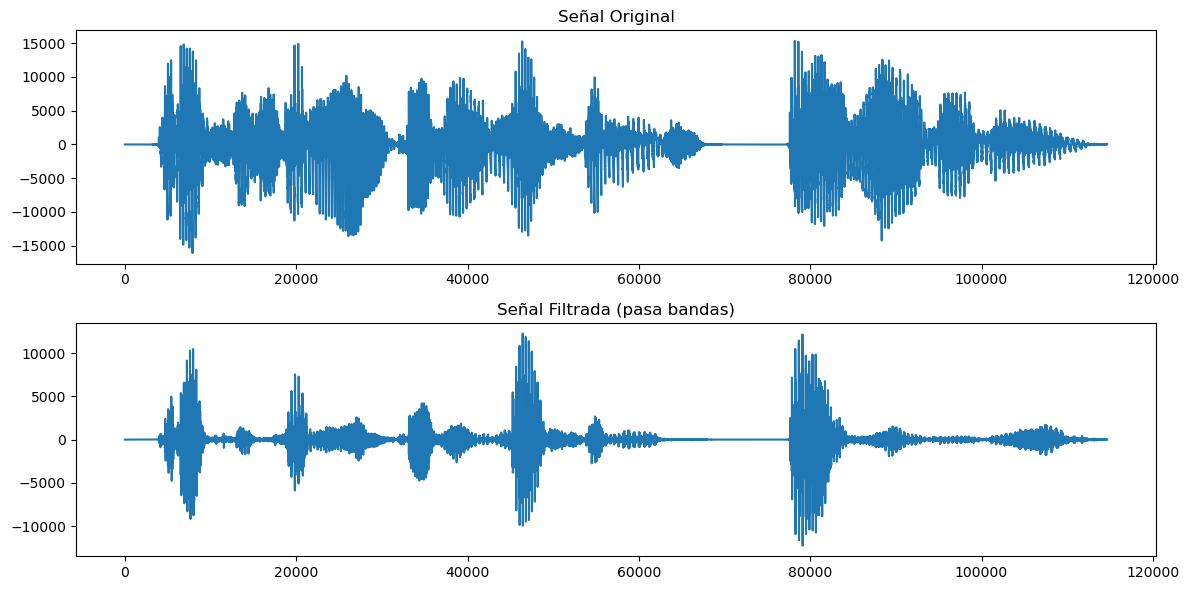

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

#Función para diseñar un filtro pasa-altos
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut / nyq
    high = highcut / nyq
    b,a = butter(order, [low, high], btype='band')
    return b,a

# Función para aplicar el filtro.
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b,a = butter_bandpass(lowcut, highcut, fs, order=order)
    y=lfilter(b,a,data)
    return y

#leer el archivo de audio
sample_rate, data = wavfile.read('un_archivo_audio.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Parámetros del filtro
lowcut = 500.0 #Frecuencia de corte baja en HZ
highcut = 1500.0 #Frecuencia de corte alta en HZ
order = 6 #Orden del filtro

#Aplicar el filtro pasa-bandas
filtered_data = bandpass_filter(data, lowcut, highcut, sample_rate, order)

#Guardar la señal filtrada en un nuevo archivo de audio
wavfile.write('audio_filtrado_pasabanda.wav', sample_rate, filtered_data.astype(np.int16))

#Visualizar la señal original y filtrada
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data)
plt.title('Señal Original')
plt.subplot(2,1,2)
plt.plot(filtered_data)
plt.title('Señal Filtrada (pasa bandas)')

plt.tight_layout()
plt.show()

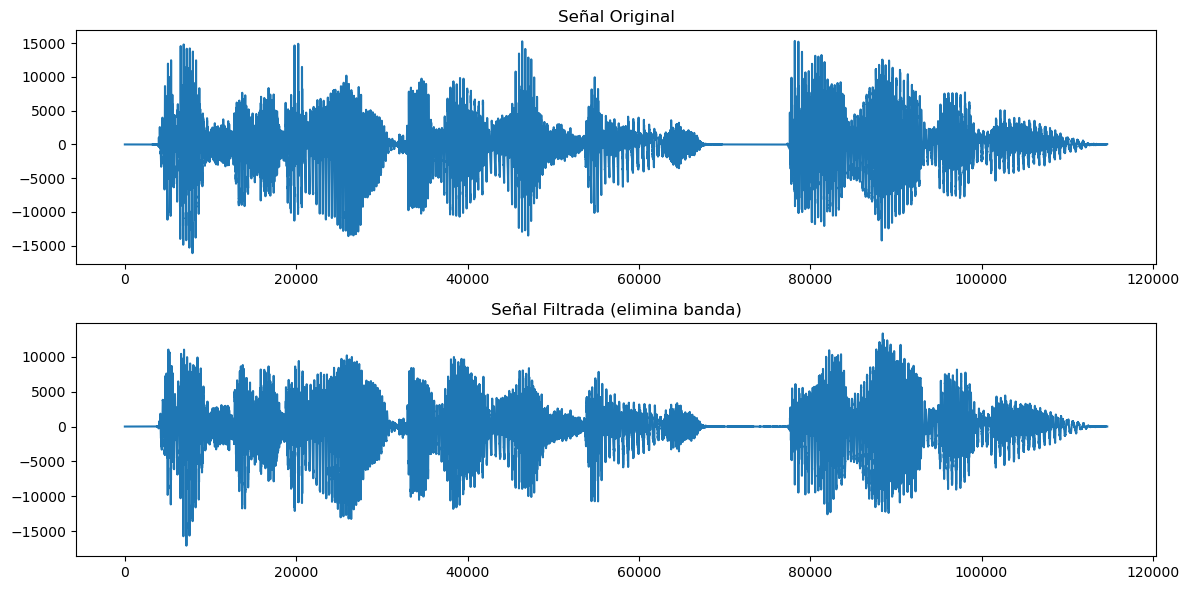

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

#Función para diseñar un filtro elimina-banda
def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut / nyq
    high = highcut / nyq
    b,a = butter(order, [low, high], btype='bandstop')
    return b,a

# Función para aplicar el filtro.
def bandstop_filter(data, lowcut, highcut, fs, order=5):
    b,a = butter_bandstop(lowcut, highcut, fs, order=order)
    y=lfilter(b,a,data)
    return y

#leer el archivo de audio
sample_rate, data = wavfile.read('un_archivo_audio.wav')

#Si el audio es estéreo, selecciona un solo canal
if len(data.shape) > 1:
    data = data[:,0]

#Parámetros del filtro
lowcut = 500.0 #Frecuencia de corte baja en HZ
highcut = 1500.0 #Frecuencia de corte alta en HZ
order = 6 #Orden del filtro

#Aplicar el filtro elimina-banda
filtered_data = bandstop_filter(data, lowcut, highcut, sample_rate, order)

#Guardar la señal filtrada en un nuevo archivo de audio
wavfile.write('audio_filtrado_eliminabanda.wav', sample_rate, filtered_data.astype(np.int16))

#Visualizar la señal original y filtrada
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data)
plt.title('Señal Original')
plt.subplot(2,1,2)
plt.plot(filtered_data)
plt.title('Señal Filtrada (elimina banda)')

plt.tight_layout()
plt.show()

EJEMPLO DE FILTRO IDEAL

 En teoría, podrías poner a cero las componentes de frecuencia que no deseas dejar pasar, y de hecho, eso es lo que hace un filtro ideal. Sin embargo, en la práctica, hay varias razones por las que esto no es tan sencillo:

Razones Prácticas y Teóra
s:
Efectos de Borde y Discontinuidades:
Discontinuidades: Si simplemente pones a cero las componentes de frecuencia no deseadas, puedes introducir discontinuidades en el dominio del tiempo cuando realizas la transformada inversa de Fourier. Esto puede resultar en artefactos no deseados en la señal filtr
ada.
Efectos de Borde: Las señales reales no son infinitamente largas, y los efectos de borde pueden causar problemas en la transformada de Fourier, resultando en filtrmado perf

ecto.
Respuesta de Fase:
Distorsión de Fase: Los filtros ideales que simplemente eliminan frecuencias pueden introducir distorsión de fase, lo que significa que las diferentes componentes de frecuencia se desplazan en el tiempo da maner no un

iforme.
Implementación Numérica:
Precisión Numérica: La implementación numérica de filtros ideales puede ser problemática debido a la precisión finita de los cálculos en computadoras. Esto puede llevar a errores de redondeo y otros pblemas n

alizables:
Filtros R
alizables: En la práctica, los filtros que se pueden implementar (realizables) tienen una respuesta de frecuencia que es una aproximación de la respuesta de un filtro ideal. Los filtros realizables, como los filtros Butterworth, Chebyshev, y otros, están diseñados para ser estables y manejables en términos de implementación.

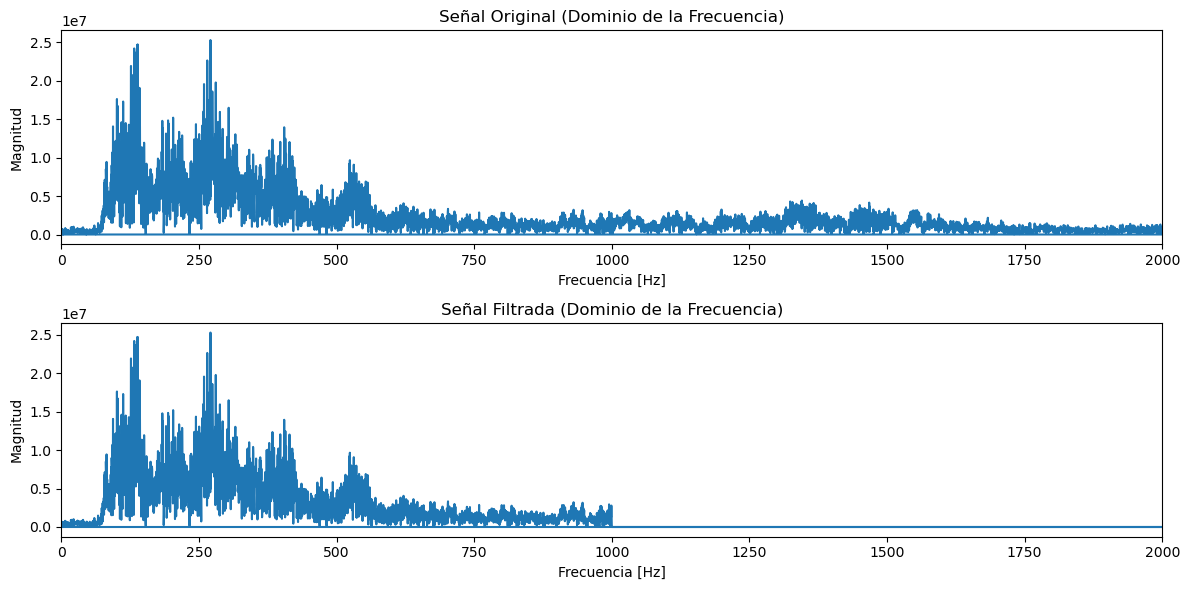

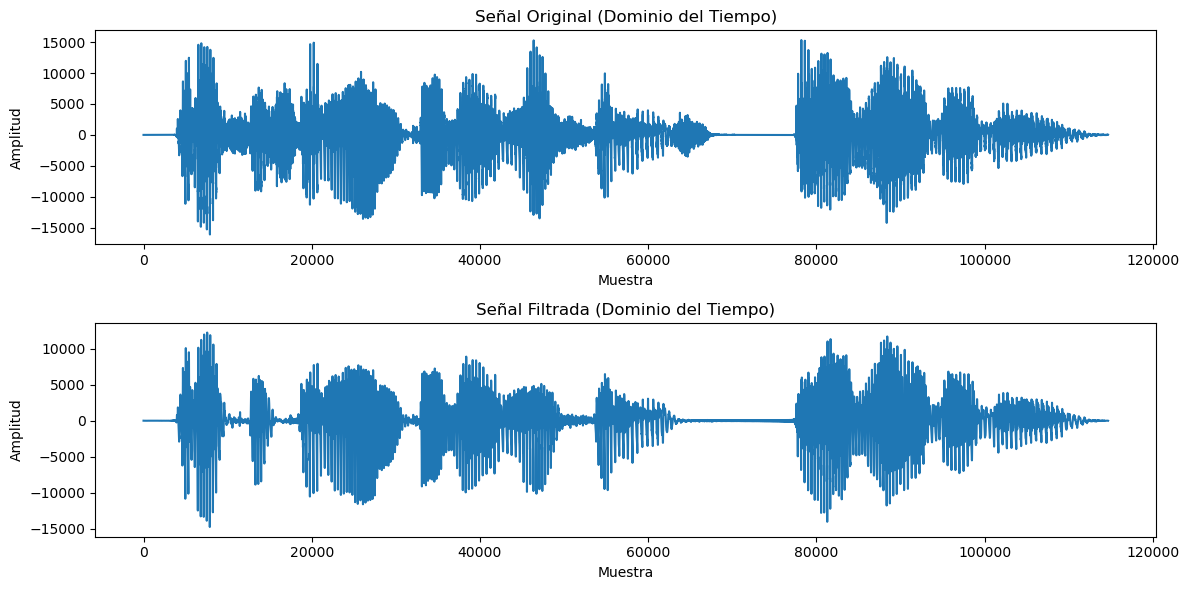

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq

# Cargar el archivo de audio
sample_rate, signal = wavfile.read('un_archivo_audio.wav')

# Si el audio es estéreo, tomar solo un canal
if len(signal.shape) == 2:
    signal = signal[:, 0]

# Realizar la Transformada de Fourier en la señal original
yf = fft(signal)
xf = fftfreq(len(signal), 1 / sample_rate)

# Aplicar un filtro ideal (poner a cero las frecuencias no deseadas)
cutoff_freq = 1000
yf_filtered = yf.copy()
yf_filtered[np.abs(xf) > cutoff_freq] = 0

# Realizar la Transformada Inversa de Fourier para obtener la señal filtrada
filtered_signal = ifft(yf_filtered)

# Graficar el espectro de frecuencia de las señales original y filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf, np.abs(yf))
plt.title('Señal Original (Dominio de la Frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización

plt.subplot(2, 1, 2)
plt.plot(xf, np.abs(yf_filtered))
plt.title('Señal Filtrada (Dominio de la Frecuencia)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 2000)  # Limitar el eje x para mejor visualización

plt.tight_layout()
plt.show()

# Graficar las señales original y filtrada en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Señal Original (Dominio del Tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal.real)
plt.title('Señal Filtrada (Dominio del Tiempo)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


Para aplicar filtros más realistas en Python, puedes utilizar diferentes tipos de filtros que están diseñados para ser más prácticos y manejables en términos de implementación y estabilidad. Aquí te muestro algunos ejemplos de filtros comunes y cómo aplicarlos usando la librería scipy.signal.

Tipos de Filtros Realistas:


Filtro Butterworth:
Características: Tiene una respuesta de frecuencia plana en la banda de paso y una transición suave hacia la banda de rechazo.
Uso: Ideal para aplicaciones donde se necesita una respuesta de frecuencia suave sin ondulaciones.

In [12]:
from scipy.signal import butter, lfilter

def butter_filter(data, cutoff, fs, order=5, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y


Filtro Chebyshev Tipo I:
Características: Tiene una respuesta de frecuencia con ondulaciones en la banda de paso pero una transición más abrupta.
Uso: Útil cuando se necesita una transición más rápida entre la banda de paso y la banda de rechazo.

In [13]:
from scipy.signal import cheby1

def cheby1_filter(data, cutoff, fs, order=5, rp=1, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = cheby1(order, rp, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y


Filtro Chebyshev Tipo II:
Características: Tiene ondulaciones en la banda de rechazo pero una banda de paso más plana.
Uso: Útil cuando se necesita una banda de paso plana y se puede tolerar ondulaciones en la banda de rechazo

In [14]:
from scipy.signal import cheby2

def cheby2_filter(data, cutoff, fs, order=5, rs=40, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = cheby2(order, rs, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y


Filtro Elíptico (Cauer):
Características: Tiene ondulaciones tanto en la banda de paso como en la banda de rechazo, pero ofrece la transición más rápida.
Uso: Ideal para aplicaciones donde se necesita una transición muy rápida entre la banda de paso y la banda de rechazo.

In [15]:
from scipy.signal import ellip

def ellip_filter(data, cutoff, fs, order=5, rp=1, rs=40, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = ellip(order, rp, rs, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y


In [ ]:
from scipy.signal import find_peaks
def detectar_picos(Y, umbral=0.1):
    picos, _ = find_peaks(Y, height=umbral)
    return picos


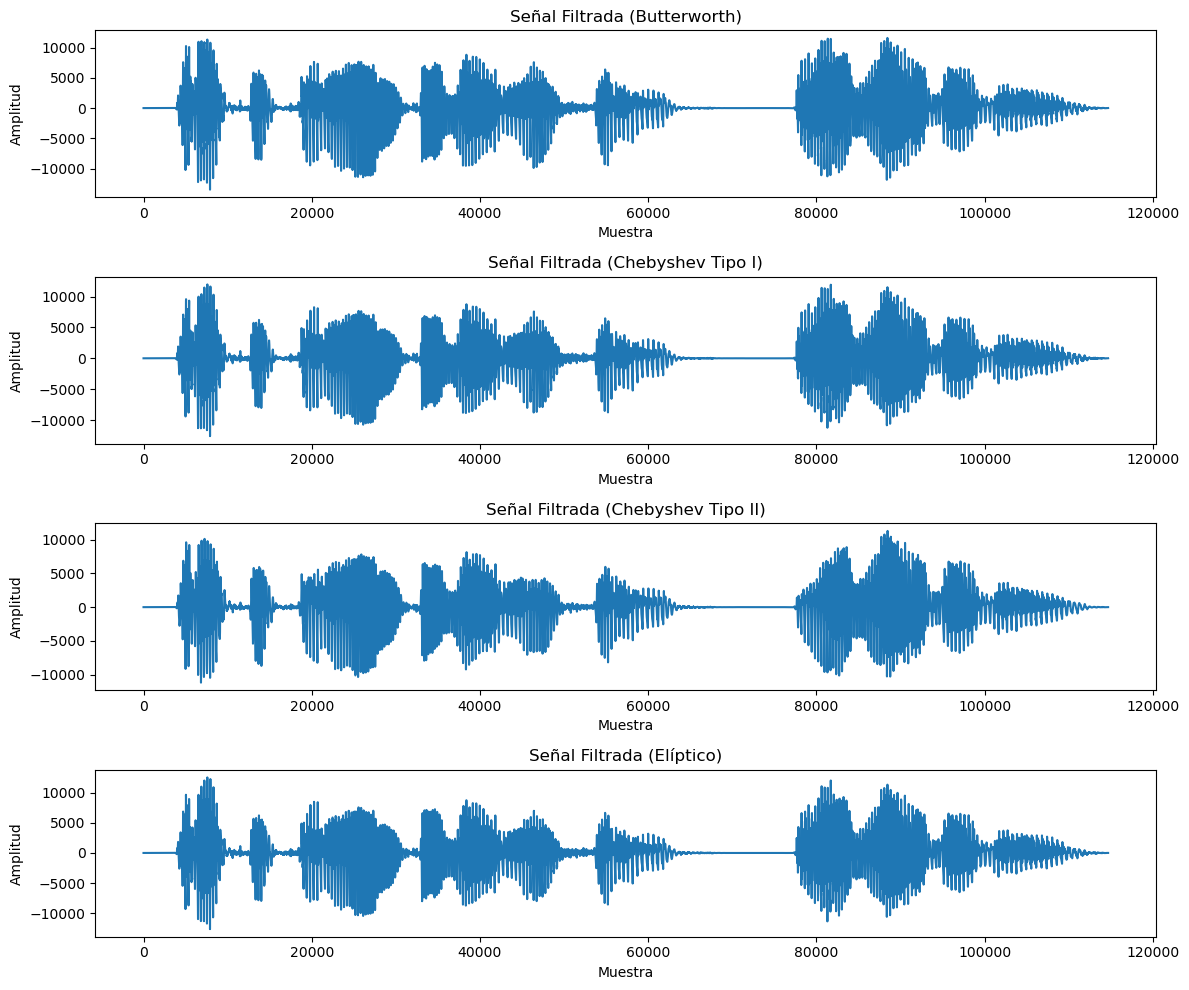

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar el archivo de audio
sample_rate, signal = wavfile.read('un_archivo_audio.wav')

# Si el audio es estéreo, tomar solo un canal
if len(signal.shape) == 2:
    signal = signal[:, 0]

# Parámetros del filtro
cutoff = 1000  # Frecuencia de corte
order = 4  # Orden del filtro

# Aplicar diferentes filtros
filtered_butter = butter_filter(signal, cutoff, sample_rate, order, btype='low')
filtered_cheby1 = cheby1_filter(signal, cutoff, sample_rate, order, rp=1, btype='low')
filtered_cheby2 = cheby2_filter(signal, cutoff, sample_rate, order, rs=40, btype='low')
filtered_ellip = ellip_filter(signal, cutoff, sample_rate, order, rp=1, rs=40, btype='low')

# Graficar las señales filtradas
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(filtered_butter)
plt.title('Señal Filtrada (Butterworth)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.plot(filtered_cheby1)
plt.title('Señal Filtrada (Chebyshev Tipo I)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 3)
plt.plot(filtered_cheby2)
plt.title('Señal Filtrada (Chebyshev Tipo II)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.plot(filtered_ellip)
plt.title('Señal Filtrada (Elíptico)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


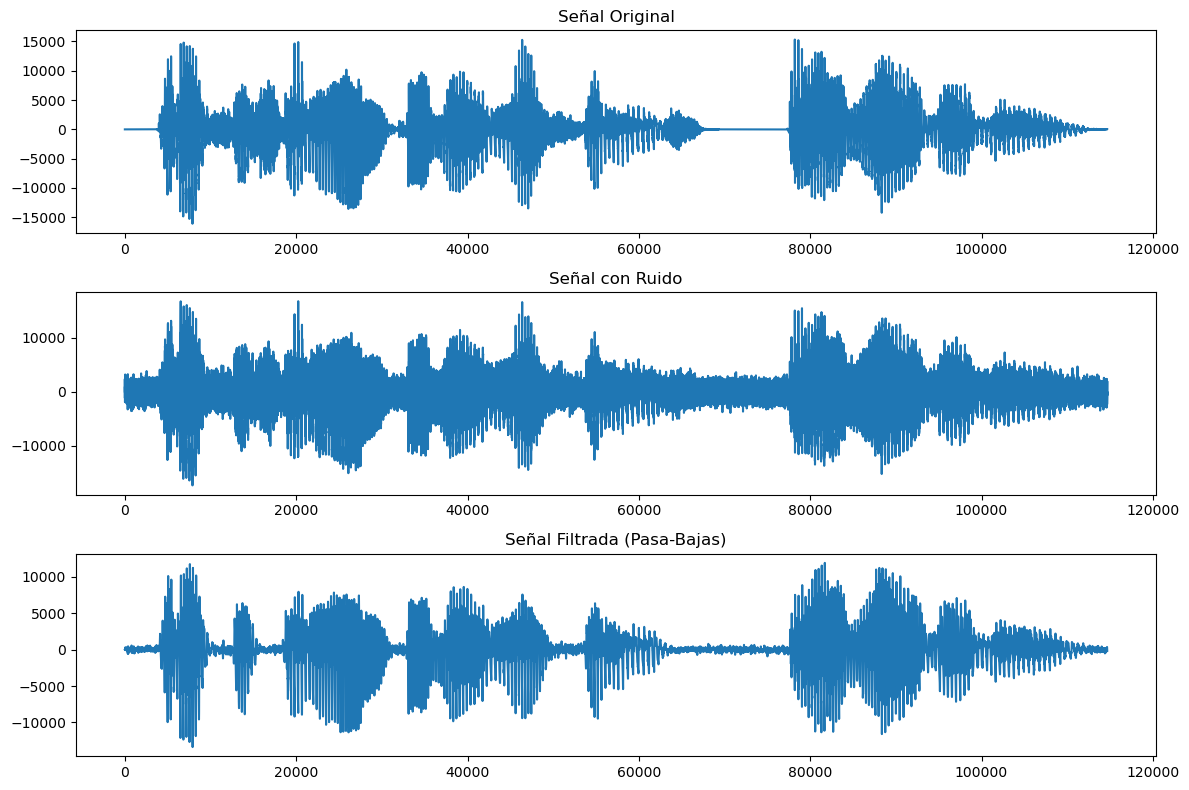

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.io import wavfile

# Cargar la señal de audio
sr, y = wavfile.read('un_archivo_audio.wav')

# Añadir ruido blanco
ruido = np.random.normal(0, 100.0, y.shape)
y_ruidosa = y + 10*ruido

# Diseño del filtro pasa-bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Aplicar el filtro pasa-bajas
cutoff = 1000  # Frecuencia de corte en Hz
y_filtrada = lowpass_filter(y_ruidosa, cutoff, sr)

# Visualización de los resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(y)
plt.title('Señal Original')

plt.subplot(3, 1, 2)
plt.plot(y_ruidosa)
plt.title('Señal con Ruido')

plt.subplot(3, 1, 3)
plt.plot(y_filtrada)
plt.title('Señal Filtrada (Pasa-Bajas)')

plt.tight_layout()
plt.show()

#Guardar la señal filtrada en un nuevo archivo de audio
wavfile.write('senalruidosa.wav', sr, y_ruidosa.astype(np.int16))
wavfile.write('senalruidosa_filtrado_pasobajo.wav', sr, y_filtrada.astype(np.int16))



##Audio en tiempo real##